In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import load_model
%matplotlib inline

from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [30]:
# df = pd.read_csv("./data/BTC-USD.csv")
# df = pd.read_csv("./data/ADA-USD.csv")
df = pd.read_csv("./data/ETH-USD.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-05,0.143129,0.145175,0.141659,0.142695,0.142695,274829819.0
1,2020-08-06,0.142704,0.145609,0.140563,0.144048,0.144048,278613533.0
2,2020-08-07,0.144080,0.146949,0.134989,0.139155,0.139155,620550178.0
3,2020-08-08,0.139089,0.147424,0.138128,0.145781,0.145781,325527431.0
4,2020-08-09,0.146315,0.152014,0.142817,0.145244,0.145244,426878184.0


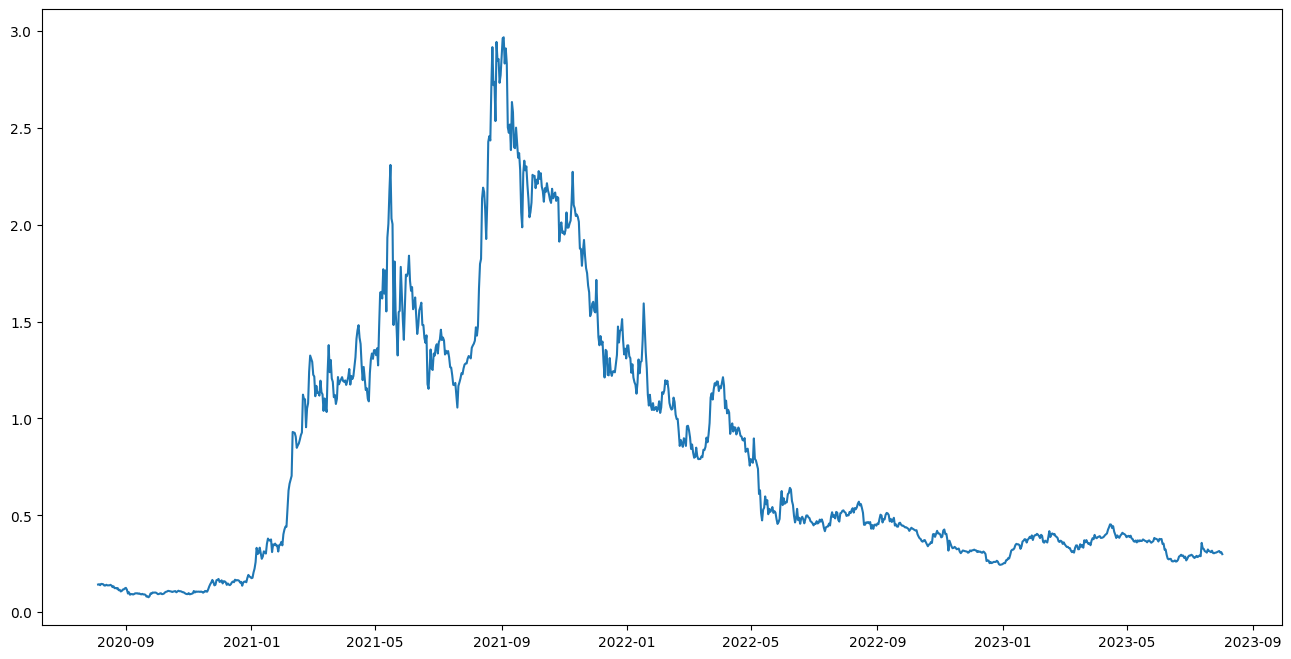

In [31]:
# df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["Date"] = pd.to_datetime(df.Date)

df.index = df['Date']

plt.figure(figsize=(16, 8))
plt.plot(df["Close"], label='Close Price history')

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [33]:
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [34]:
lstm_model = load_model("saved_lstm_model.h5")

In [35]:
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i - 60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

4/4 [==============================] - 1s 21ms/step


C:\Users\khoid\AppData\Local\Temp\ipykernel_2452\2176615398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = closing_price


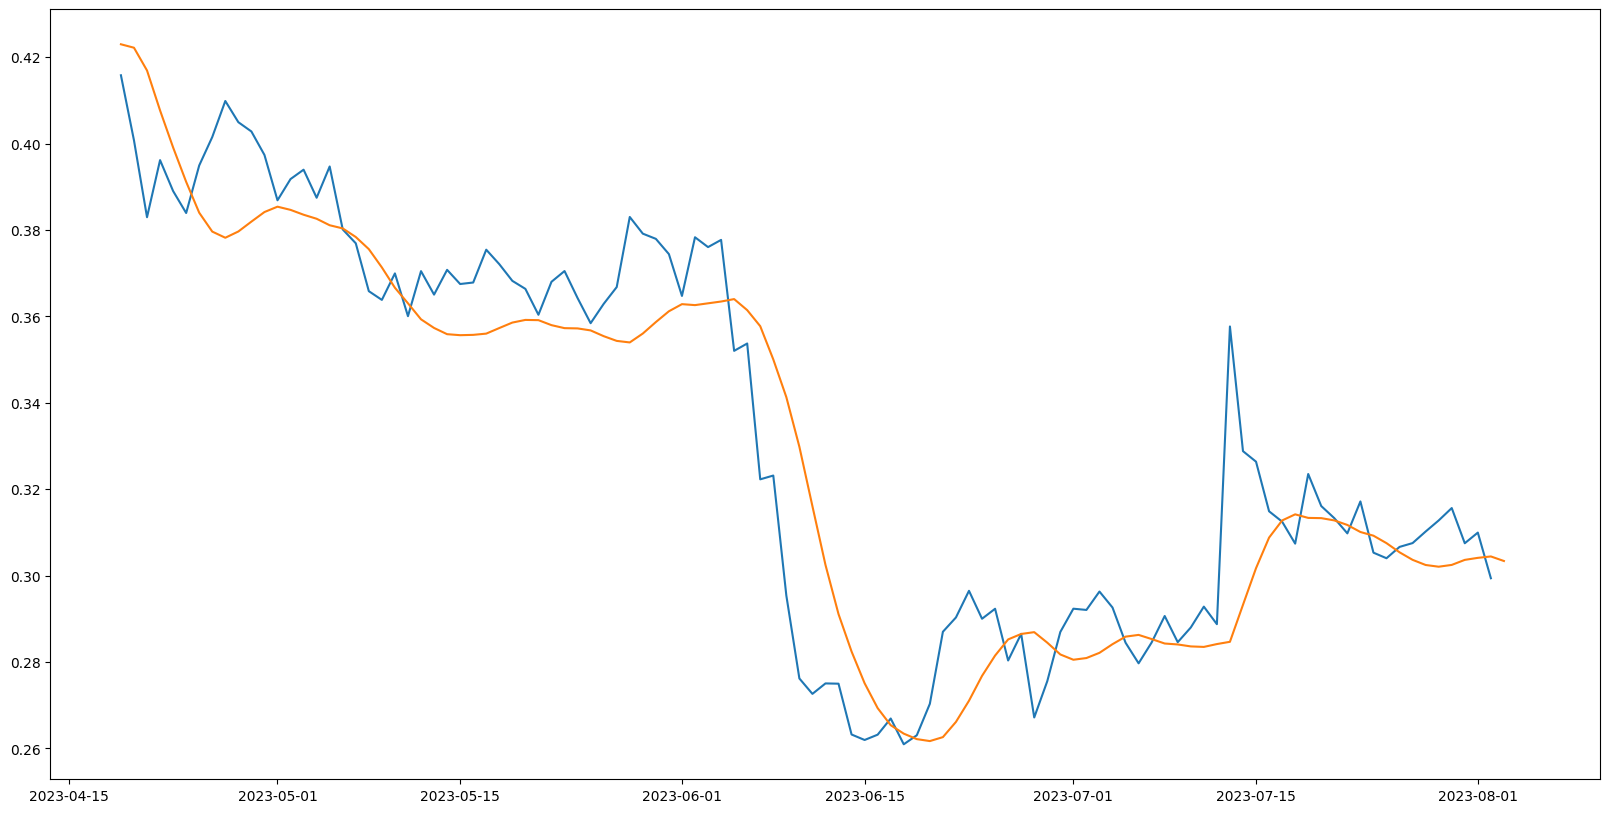

In [37]:
train_data = new_dataset[:987]
valid_data = new_dataset[987:]
valid_data['Predictions'] = closing_price
# plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', "Predictions"]])